## Random Forest

**Random forest** builds multiple decision trees and merges them together to get a more accurate and stable prediction.

Random Forest adds additional randomness to the model, while growing the trees. Instead of searching for the most important feature while splitting a node, it searches for the best feature among a random subset of features. This results in a wide diversity that generally results in a better model.

Therefore, in Random Forest, only a random subset of the features is taken into consideration by the algorithm for splitting a node. You can even make trees more random, by additionally using random thresholds for each feature rather than searching for the best possible thresholds (like a normal decision tree does).

**How it works:**

We have an input with missing data:
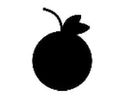

Random Forest model searches through all decision trees and looks for the closest combination of features:

**Decision tree No. 1:**
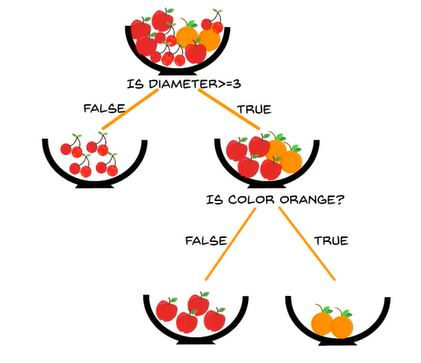
Based on criteria, the mistery fruit is classified as an orange.

**Decision tree No.2:**
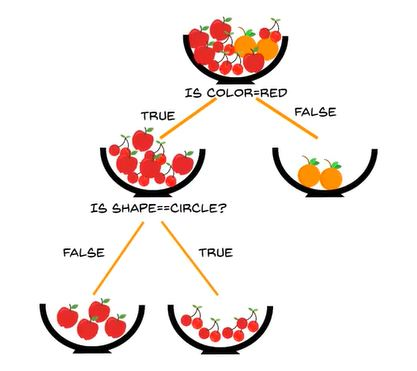
Based on criteria, the mistery fruit is classified as a cherry.

**Decision tree No.3:**
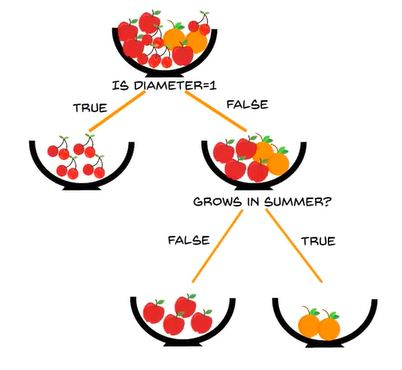
Based on criteria, the mistery fruit is classified as an orange.

In total, since most features recognizes are of an orange, the mistery fruit is classified as an orange.

***Great sources:***
-  https://towardsdatascience.com/the-random-forest-algorithm-d457d499ffcd
-  https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
-  https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
-  https://www.youtube.com/watch?v=eM4uJ6XGnSM&list=PLEiEAq2VkUULYYgj13YHUWmRePqiu8Ddy&index=18

### Example: Iris Setosa Classification

In [1]:
import numpy as np; np.random.seed(0)
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

In [2]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
df["species"] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# Creating Test and Train Data
# random number between 0 and 1, if less than .75 True, False otherwise
    # 75% of the data for training
df["is_train"] = np.random.uniform(0, 1, len(df)) <= .75
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,is_train
0,5.1,3.5,1.4,0.2,setosa,True
1,4.9,3.0,1.4,0.2,setosa,True
2,4.7,3.2,1.3,0.2,setosa,True
3,4.6,3.1,1.5,0.2,setosa,True
4,5.0,3.6,1.4,0.2,setosa,True


In [5]:
train, test = df[df["is_train"] == True], df[df["is_train"] == False]

print("Num of observations in training data: {}".format(len(train)))
print("Num of observations in test data: {}".format(len(test)))

Num of observations in training data: 118
Num of observations in test data: 32


In [6]:
features = df.columns[:4]
features

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [7]:
# Converting each species name into digits
y = pd.factorize(train["species"])[0]  # factorize looks how many different values
    # are there - 3 in this case
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [8]:
clf = RandomForestClassifier(n_jobs=2, random_state=0)
clf.fit(train[features], y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [9]:
clf.predict(test[features])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [10]:
# Viewing the predicted probabilities of the first 10 observations
clf.predict_proba(test[features])[:10]

array([[1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0.9, 0.1, 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ]])

In [11]:
clf.predict_proba(test[features])[10:20]  # when two votes are the same the
    # algorithm goes with the first one

array([[1. , 0. , 0. ],
       [0.9, 0.1, 0. ],
       [1. , 0. , 0. ],
       [0. , 0.5, 0.5],
       [0. , 1. , 0. ],
       [0. , 0.9, 0.1],
       [0. , 0.2, 0.8],
       [0. , 0.3, 0.7],
       [0. , 1. , 0. ],
       [0. , 0.8, 0.2]])

In [12]:
# Mapping names for the plants
preds = iris.target_names[clf.predict(test[features])]
preds[:5]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa'], dtype='<U10')

In [13]:
# Viewing the actual species 
test["species"].head()  # They match - forest vs data

7     setosa
8     setosa
10    setosa
13    setosa
17    setosa
Name: species, dtype: category
Categories (3, object): [setosa, versicolor, virginica]

In [14]:
# Creating confusion matrix
pd.crosstab(test["species"], preds, rownames=["Actual Species"], colnames=["Predicted Species"])

Predicted Species,setosa,versicolor,virginica
Actual Species,,,
setosa,13,0,0
versicolor,0,5,2
virginica,0,0,12


**Diagonal values** - accurate predictions
**Other values** - inaccurate predictions

In [15]:
accuracy = 30 / 32; accuracy*100

93.75

In [16]:
new_pred = iris.target_names[clf.predict([[5.0, 3.6, 1.4, 2.0], [5.0, 3.6, 1.4, 2.0]])]
new_pred  # making new predictions

array(['versicolor', 'versicolor'], dtype='<U10')